In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

In [16]:
import pickle as pkl
import pandas as pd

with open('data_50_panels_5_counterf_selection.pkl', 'rb') as handle:  # put file name here
    all_data: list[dict] = pkl.load(handle)
    #print(len(all_data))  # amount of panels
    #print(len(all_data[0]["changes"]))  # amount of counterfactuals for each panel
    #print(all_data[0].keys())  # for each panel, there is the original panel, changes(counterfactuals), and the new walkaway probabilities after changes
    #print(all_data[0]["panel"].columns)  # columns of each panel

for panel in all_data:
    original_panel: pd.Series = panel["panel"]  # the original panel
    original_walkaway_probability: float = original_panel["walkaway_probability"]  # original panels walkaway probability
    counterfactuals: pd.DataFrame = panel["changes"]  # all counterfactuals for this panel
    new_walkaway_probs: list = panel["new_walkaway_probabilities"]  # walkaway probabilities after applying counterfactuals

    #print(len(counterfactuals))  # amount of counterfactuals for this panel
    #print(original_panel["median_cost"])  # get some feature of panel

    for counterfactual_idx in range(len(new_walkaway_probs)):  # look through each counterfactual for this panel
        changes: pd.Series = counterfactuals.iloc[counterfactual_idx]  # the changes that were made
        new_walkaway_prob: float = new_walkaway_probs[counterfactual_idx]  # the new walkaway probability after changes

        #print(changes)
        #print(new_walkaway_prob)

        # you can get the changed full panel like this (add the changes to the original panel and set the new walkaway prob)
        counterfactual_panel: pd.Series = original_panel.iloc[0] + changes.fillna(0)
        counterfactual_panel["walkaway_probability"] = new_walkaway_prob

        #print(new_panel["median_cost"])

In [17]:
minimal_slotcost_changes = {}
for i in range(1, 31):
    minimal_slotcost_changes[i] = []


for panel in all_data:
    counterfactuals: pd.DataFrame = panel["changes"]
    smallest_slotchange = 10000
    smallest_counterfactuals = pd.Series(dtype=object)
    for counterfactual_idx in range(len(counterfactuals)):
        changes: pd.Series = counterfactuals.iloc[counterfactual_idx]
        slotchange = 0
        for i in range (len(changes.keys())):
            if "slotcost" in changes.keys()[i]:
                if str(changes.values[i]) != "nan":
                        slotchange += abs(changes.values[i])
        if slotchange < smallest_slotchange:
            smallest_slotchange = slotchange
            smallest_counterfactuals = changes
    for i in range (len(smallest_counterfactuals.keys())):
            if "slotcost" in changes.keys()[i]:
                slot_no = changes.keys()[i].split("_")[1]
                if str(changes.values[i]) != "nan":
                    minimal_slotcost_changes[int(slot_no)].append(changes.values[i])

minimal_slotcost_changes

{1: [-0.0887473531726668,
  -1.6916955352850858,
  -2.106876730374454,
  -1.5805899215378156,
  -0.6314990610676698,
  0.4352437129368898,
  3.225261199379603,
  1.171256812522481],
 2: [0.28911325851171643, -1.962411143658322],
 3: [3.6593310099642657,
  -1.9689673518420774,
  3.0801064755577965,
  -1.8179420366449337,
  2.3940273035235364,
  2.891894892986496,
  -2.0332302236865276],
 4: [-0.06869647230770415, -0.3461884496497909, 2.1839122141172753],
 5: [1.9065247949483384,
  1.6961027765512284,
  -1.5004842357883401,
  1.365480581005862],
 6: [2.554043517244761, 0.7771459804942991, -0.2805228641561266],
 7: [0.9306564172447613, 2.6826178795615725, -0.7030298775272499],
 8: [0.9925568977220491,
  3.2858406283390273,
  3.3431666323135554,
  0.447960713961451,
  4.54581787110884,
  -0.6008092365940714,
  4.211303475282501,
  3.6545644933076016,
  4.402791909758679,
  -0.7669851501937659],
 9: [3.466292911206941, 2.854827757019483],
 10: [-0.7741645813651941,
  2.1234709546903145,
  -

In [18]:
slotcost_changes = {}
for i in range(1, 31):
    slotcost_changes[i] = []

cost_change = []
slot_start = []
first_purchase = []
    
for panel in all_data:
    counterfactuals: pd.DataFrame = panel["changes"]
    for counterfactual_idx in range(len(counterfactuals)):
        changes: pd.Series = counterfactuals.iloc[counterfactual_idx]
        for i in range (len(changes.keys())):
            if "slotcost" in changes.keys()[i]:
                slot_no = changes.keys()[i].split("_")[1]
                add = changes.values[i]
                if str(changes.values[i]) != "nan":
                    
                    slotcost_changes[int(slot_no)].append(add)
                    start_no = "slot_start_"+slot_no
                    cost_change.append(add)
                    slot_start.append(panel["panel"][start_no].values[0])
                    first_purchase.append(panel["panel"]["days_since_first_purchase"].values[0])
        
cost_change

[-0.5770336947429069,
 -2.0996000947429065,
 2.3737848410283275,
 -1.6691068947429066,
 -2.0996000947429065,
 -1.0561410947429062,
 -1.466778094818328,
 -1.222841265081768,
 0.41070242013959746,
 2.5433489949483397,
 2.1227479172447614,
 0.20777964555869222,
 1.8590546787082571,
 2.1158721749447107,
 2.4053878644384996,
 0.08365589935256423,
 0.28241221228038604,
 0.7901786311975432,
 0.3940066356414409,
 0.564774093559163,
 -1.262087890423948,
 2.1067608507000095,
 1.9065247949483384,
 0.9306564172447613,
 2.5638007787082566,
 1.454819164438499,
 0.2774183993525643,
 2.8030042935591633,
 2.4496894095760524,
 2.361466850700009,
 2.554043517244761,
 0.9925568977220491,
 2.2405558117892577,
 1.6883875117892577,
 -1.3832918798604021,
 2.949520794948339,
 0.7987891455586915,
 -0.8456972250552894,
 2.3222217644385,
 -0.43774020064743535,
 -0.626593664358559,
 0.0971238935591634,
 0.7743960507000098,
 4.166818897722049,
 1.0202847614403936,
 0.1177950823328171,
 2.2761076207200315,
 0.175135

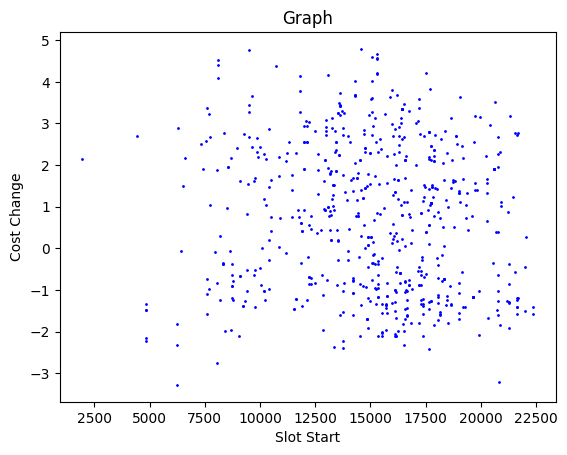

In [19]:
plt.scatter(slot_start, cost_change, color='blue', marker='o', s=1)

plt.xlabel('Slot Start')
plt.ylabel('Cost Change')
plt.title('Graph')

plt.show()

C:\Users\mkuusvek\AppData\Local\Temp\ipykernel_12480\1556397897.py:5: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


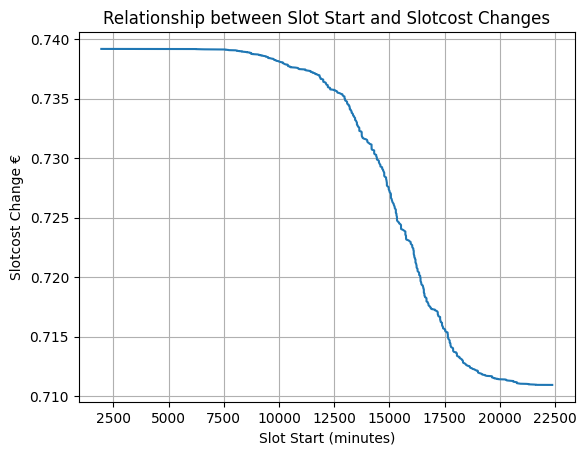

In [20]:
sorted_data = sorted(zip(slot_start, cost_change))
slot_start_sorted, cost_change_sorted = zip(*sorted_data)


from scipy.ndimage.filters import gaussian_filter1d

plt.xlabel('Slot Start (minutes)')
plt.ylabel('Slotcost Change €')
plt.title('Relationship between Slot Start and Slotcost Changes')

plt.grid(True)

ysmoothed = gaussian_filter1d(cost_change_sorted, sigma=500)
plt.plot(slot_start_sorted, ysmoothed)
plt.show()

C:\Users\mkuusvek\AppData\Local\Temp\ipykernel_12480\194134616.py:5: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


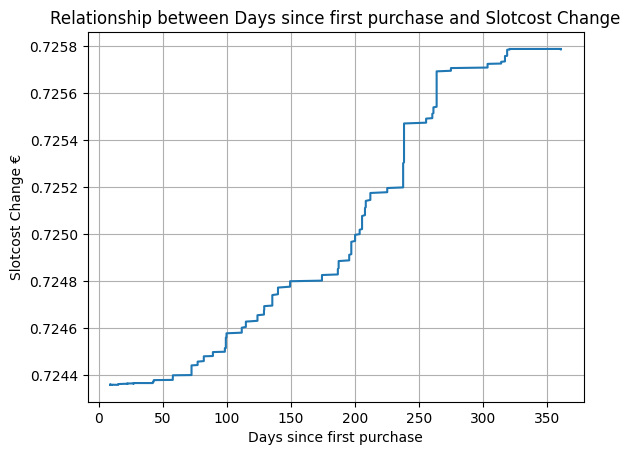

In [21]:
sorted_data = sorted(zip(first_purchase, cost_change))
first_purchase_sorted, cost_change_sorted2 = zip(*sorted_data)


from scipy.ndimage.filters import gaussian_filter1d

plt.xlabel('Days since first purchase')
plt.ylabel('Slotcost Change €')
plt.title('Relationship between Days since first purchase and Slotcost Change')

plt.grid(True)

ysmoothed = gaussian_filter1d(cost_change_sorted2, sigma=700)
plt.plot(first_purchase_sorted, ysmoothed)
plt.show()

In [22]:
# Negative/Positive

slotcost_changes_negatives = {}
for i in range(1, 31):
    slotcost_changes_negatives[i] = []

slotcost_changes_positives = {}
for i in range(1, 31):
    slotcost_changes_positives[i] = []

for item in slotcost_changes:
    for value in slotcost_changes[item]:
        if value >= 0:
            slotcost_changes_positives[item].append(value)
        else:
            slotcost_changes_negatives[item].append(value)

slotcost_means_positives = {}
for i in range(1, 31):
    slotcost_means_positives[i] = 0

slotcost_means_negatives = {}
for i in range(1, 31):
    slotcost_means_negatives[i] = 0

for i in range(1, len(slotcost_changes_positives)+1):
    if len(slotcost_changes[i]) == 0:
        continue
    slotcost_means_positives[i] = round(np.mean(slotcost_changes_positives[i]), 2)

for i in range(1, len(slotcost_changes_negatives)+1):
    if len(slotcost_changes[i]) == 0:
        continue
    slotcost_means_negatives[i] = round(np.mean(slotcost_changes_negatives[i]), 2)


In [23]:
slotcost_means = {}
for i in range(1, 31):
    slotcost_means[i] = 0

minimal_slotcost_means = {}
for i in range(1, 31):
    slotcost_means[i] = 0

for i in range(1, len(slotcost_changes)+1):
    if len(slotcost_changes[i]) == 0:
        continue
    slotcost_means[i] = round(np.mean(slotcost_changes[i]), 2)

#for i in range(1, len(minimal_slotcost_changes)+1):
#    if len(minimal_slotcost_changes[i]) == 0:
#        continue
#    minimal_slotcost_means[i] = round(np.mean(minimal_slotcost_changes[i]), 2)

print(minimal_slotcost_means)
print(slotcost_means)
print(slotcost_means_negatives)
print(slotcost_means_positives)

{}
{1: -0.39, 2: -0.25, 3: 1.12, 4: 0.47, 5: 0.3, 6: 0.87, 7: 0.44, 8: 3.13, 9: 0.93, 10: 0.59, 11: 1.09, 12: -0.31, 13: 1.1, 14: 0.03, 15: 1.34, 16: 0.34, 17: 0.6, 18: 0.71, 19: 0.19, 20: 0.82, 21: 0.76, 22: 0.3, 23: 0.62, 24: 1.24, 25: 0.61, 26: 0.71, 27: -0.6, 28: 0.6, 29: 0.72, 30: 1.37}
{1: -1.22, 2: -1.34, 3: -1.88, 4: -0.58, 5: -1.25, 6: -0.77, 7: -0.99, 8: -0.68, 9: -0.97, 10: -1.14, 11: -0.89, 12: -1.04, 13: -0.85, 14: -1.49, 15: -0.48, 16: -1.2, 17: -1.14, 18: -1.04, 19: -1.28, 20: -0.77, 21: -1.46, 22: -1.29, 23: -0.87, 24: -0.85, 25: -1.25, 26: -1.08, 27: -1.34, 28: -1.1, 29: -1.16, 30: -1.01}
{1: 1.98, 2: 1.26, 3: 2.78, 4: 1.32, 5: 1.98, 6: 1.78, 7: 1.55, 8: 3.56, 9: 1.6, 10: 1.91, 11: 1.75, 12: 1.43, 13: 1.56, 14: 1.23, 15: 1.76, 16: 2.0, 17: 1.29, 18: 1.73, 19: 1.45, 20: 1.7, 21: 1.65, 22: 1.37, 23: 1.73, 24: 1.66, 25: 1.65, 26: 1.6, 27: 1.51, 28: 2.14, 29: 2.42, 30: 1.71}


In [24]:
index = 1
rows, cols = 6, 5
slotcost_changes = np.zeros((rows, cols), dtype=float)
minimal_slotcost_changes = np.zeros((rows, cols), dtype=float)
slotcost_changes_negatives = np.zeros((rows, cols), dtype=float)
slotcost_changes_positives = np.zeros((rows, cols), dtype=float)

for j in range(5):
    for i in range(6):
        slotcost_changes[i][j] = slotcost_means[index]
        #minimal_slotcost_changes[i][j] = minimal_slotcost_means[index]
        slotcost_changes_negatives[i][j] = slotcost_means_negatives[index]
        slotcost_changes_positives[i][j] = slotcost_means_positives[index]
        index += 1

slotcost_changes_negatives

array([[-1.22, -0.99, -0.85, -1.28, -1.25],
       [-1.34, -0.68, -1.49, -0.77, -1.08],
       [-1.88, -0.97, -0.48, -1.46, -1.34],
       [-0.58, -1.14, -1.2 , -1.29, -1.1 ],
       [-1.25, -0.89, -1.14, -0.87, -1.16],
       [-0.77, -1.04, -1.04, -0.85, -1.01]])

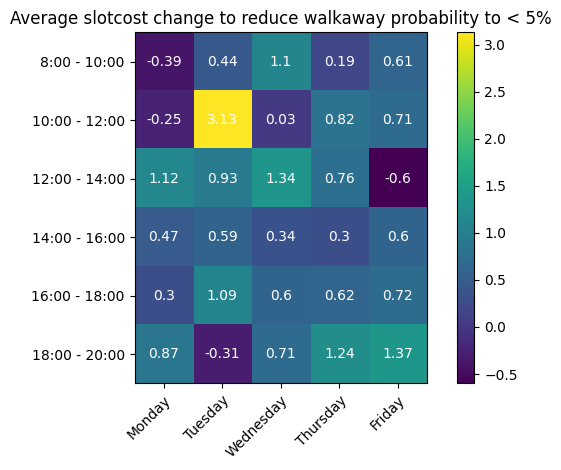

In [25]:
slottimes = ["8:00 - 10:00", "10:00 - 12:00", "12:00 - 14:00", "14:00 - 16:00", "16:00 - 18:00", "18:00 - 20:00"]
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

fig, ax = plt.subplots()
im1 = ax.imshow(slotcost_changes, cmap='viridis')

ax.set_xticks(np.arange(len(weekdays)), labels=weekdays)
ax.set_yticks(np.arange(len(slottimes)), labels=slottimes)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(len(slottimes)):
    for j in range(len(weekdays)):
        text = ax.text(j, i, slotcost_changes[i, j],
                       ha="center", va="center", color="w")

cbar = plt.colorbar(im1, ax=ax)

ax.set_title("Average slotcost change to reduce walkaway probability to < 5%")
fig.tight_layout()
plt.show()

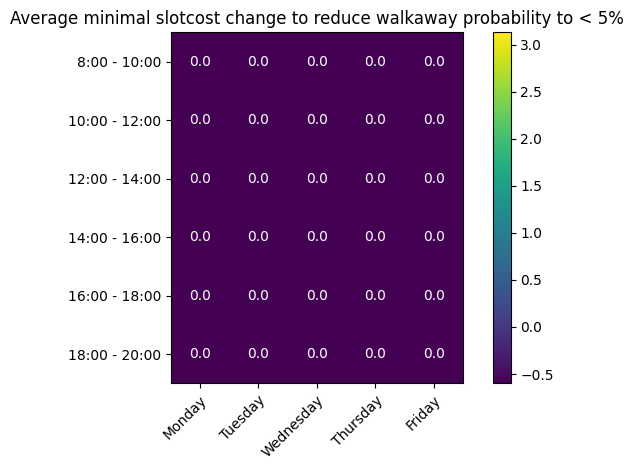

In [26]:

fig, ax = plt.subplots()
im2 = ax.imshow(minimal_slotcost_changes, cmap='viridis')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(weekdays)), labels=weekdays)
ax.set_yticks(np.arange(len(slottimes)), labels=slottimes)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(slottimes)):
    for j in range(len(weekdays)):
        text = ax.text(j, i, minimal_slotcost_changes[i, j],
                       ha="center", va="center", color="w")

cbar = plt.colorbar(im1, ax=ax)

ax.set_title("Average minimal slotcost change to reduce walkaway probability to < 5%")
fig.tight_layout()
plt.show()

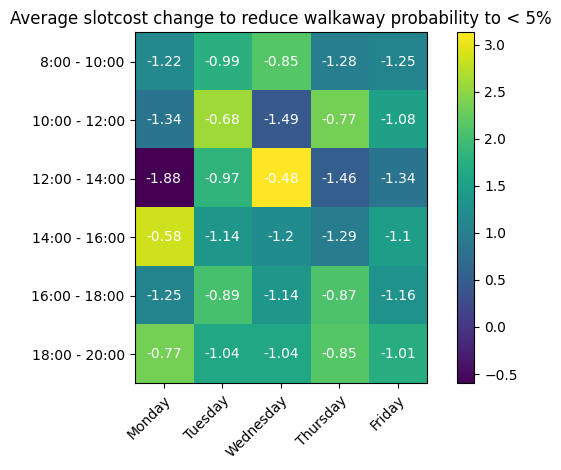

In [27]:
fig, ax = plt.subplots()
im3 = ax.imshow(slotcost_changes_negatives, cmap='viridis')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(weekdays)), labels=weekdays)
ax.set_yticks(np.arange(len(slottimes)), labels=slottimes)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(slottimes)):
    for j in range(len(weekdays)):
        text = ax.text(j, i, slotcost_changes_negatives[i, j],
                       ha="center", va="center", color="w")

cbar = plt.colorbar(im1, ax=ax)

ax.set_title("Average slotcost change to reduce walkaway probability to < 5%")
fig.tight_layout()
plt.show()

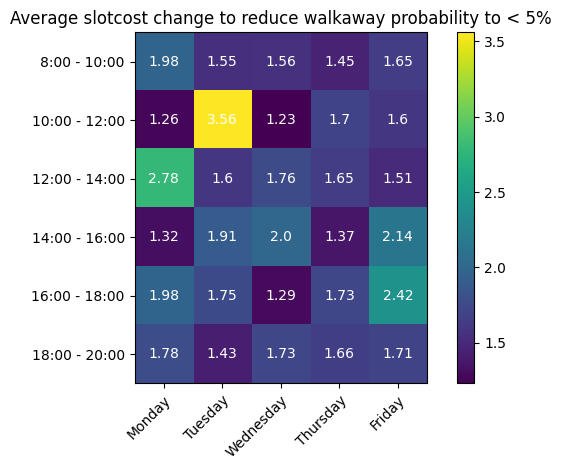

In [28]:
fig, ax = plt.subplots()
im4 = ax.imshow(slotcost_changes_positives, cmap='viridis')

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(weekdays)), labels=weekdays)
ax.set_yticks(np.arange(len(slottimes)), labels=slottimes)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(slottimes)):
    for j in range(len(weekdays)):
        text = ax.text(j, i, slotcost_changes_positives[i, j],
                       ha="center", va="center", color="w")

cbar = plt.colorbar(im4, ax=ax)

ax.set_title("Average slotcost change to reduce walkaway probability to < 5%")
fig.tight_layout()
plt.show()

In [29]:
avg_days_original = []
avg_days = []
avg_expanding_original = []
avg_expanding = []

for panel in all_data:
    avg_days_original.append(panel["panel"]["days_since_first_purchase"])
    avg_expanding_original.append(panel["panel"]["expanding_avg_days_to_delivery"])
    counterfactuals: pd.DataFrame = panel["changes"]
    for counterfactual_idx in range(len(counterfactuals)):
        changes: pd.Series = counterfactuals.iloc[counterfactual_idx]
        for i in range (len(changes.keys())):
            if "days_since" in changes.keys()[i]:
                if str(changes.values[i]) != "nan":
                    avg_days.append(changes.values[i])
            if "expanding_avg_days" in changes.keys()[i]:
                if str(changes.values[i]) != "nan":
                    avg_expanding.append(changes.values[i])

print(np.mean(avg_days_original))
print(len(avg_days))
print(np.mean(avg_days))
print(np.mean(avg_expanding_original))
print(len(avg_expanding))
print(np.mean(avg_expanding))

168.63580076828558
7
-85.184152622481
1.4546844200699574
6
0.796877955508693
